<a href="https://colab.research.google.com/github/nadasul/MASAR_Bootcamp/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original DataFrame:
   Year  Sales  Profit  Expenses
0  2010    500      50       400
1  2011    700     100       500
2  2012    600      80       450
3  2013    800     120       600
4  2014   1000     150       700


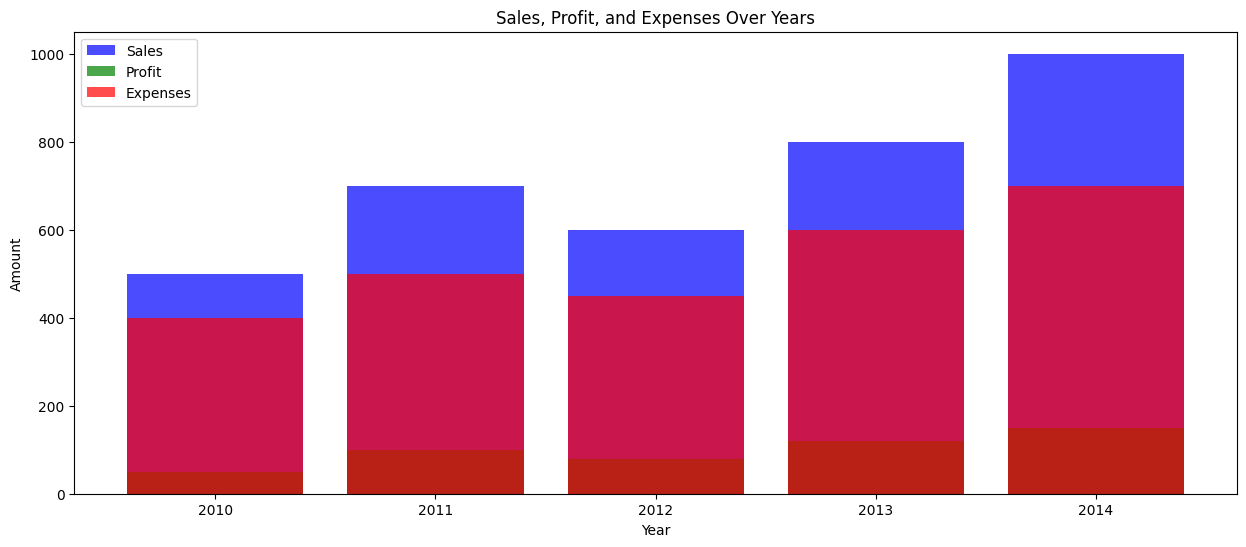

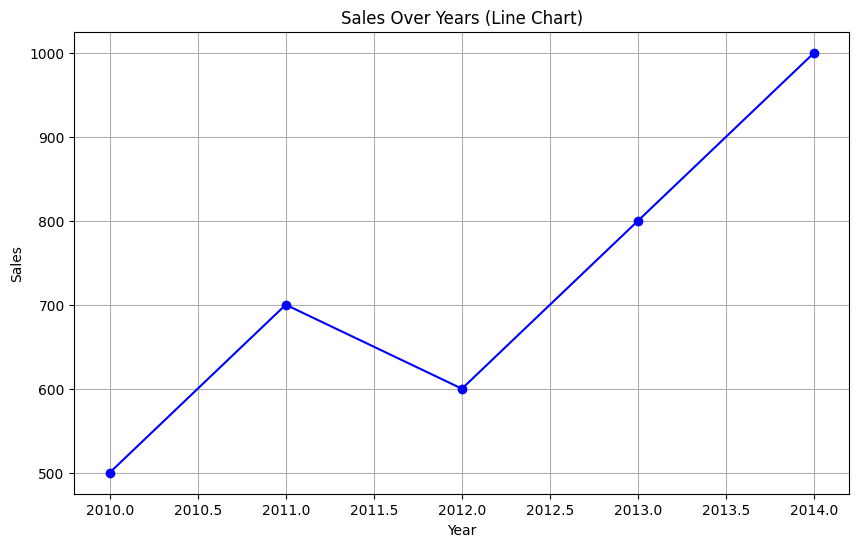

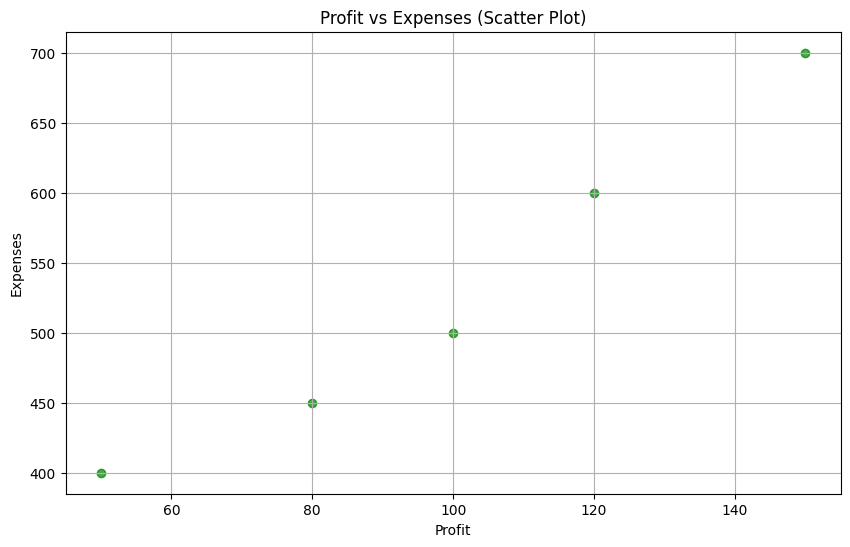

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a sample DataFrame
data = {
    'Year': [2010, 2011, 2012, 2013, 2014],
    'Sales': [500, 700, 600, 800, 1000],
    'Profit': [50, 100, 80, 120, 150],
    'Expenses': [400, 500, 450, 600, 700]
}

df = pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Bar Plot for Sales, Profit, and Expenses over Years
plt.figure(figsize=(15, 6))
plt.bar(df['Year'], df['Sales'], label='Sales', color='blue', alpha=0.7)
plt.bar(df['Year'], df['Profit'], label='Profit', color='green', alpha=0.7)
plt.bar(df['Year'], df['Expenses'], label='Expenses', color='red', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Sales, Profit, and Expenses Over Years')
plt.legend()
plt.show()

# Line Chart for Sales over Years
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Sales'], marker='o', linestyle='-', color='blue')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Over Years (Line Chart)')
plt.grid(True)
plt.show()

# Scatter Plot for Profit vs Expenses
plt.figure(figsize=(10, 6))
plt.scatter(df['Profit'], df['Expenses'], color='green', alpha=0.7)
plt.xlabel('Profit')
plt.ylabel('Expenses')
plt.title('Profit vs Expenses (Scatter Plot)')
plt.grid(True)
plt.show()


In [ ]:
df['new'] = df['Profit'] * 2
df

,Year,Sales,Profit,Expenses,Profit_Sales_Expenses,new
0,2010,500,50,400,24600,100
1,2011,700,100,500,69500,200
2,2012,600,80,450,47550,160
3,2013,800,120,600,95400,240
4,2014,1000,150,700,149300,300


Original DataFrame:
  Country       GDP  LifeExpectancy  Population
0     USA  21433225            78.9   331002651
1   China  14342903            76.7  1444216107
2   India   2875148            69.4  1380004385
3  Brazil   1839875            75.7   212559417
4  Russia   1669823            72.7   145934462


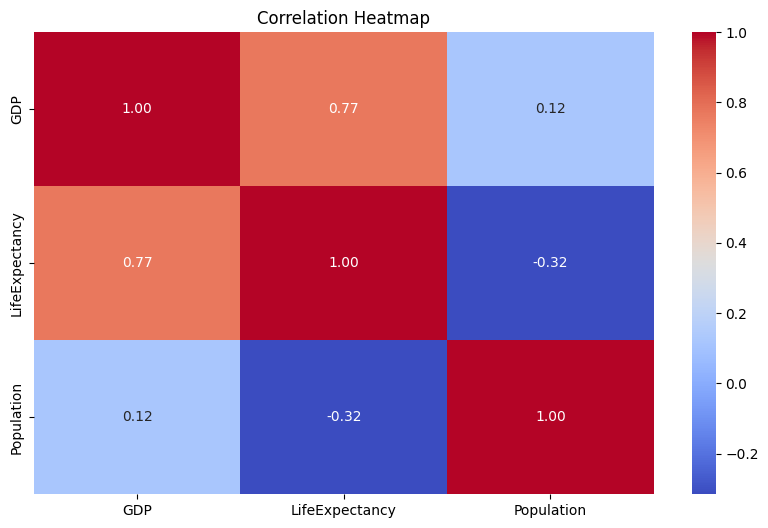

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

# Create a sample DataFrame with country data
data = {
    'Country': ['USA', 'China', 'India', 'Brazil', 'Russia'],
    'GDP': [21433225, 14342903, 2875148, 1839875, 1669823],  # in million USD
    'LifeExpectancy': [78.9, 76.7, 69.4, 75.7, 72.7],
    'Population': [331002651, 1444216107, 1380004385, 212559417, 145934462]
}


df = pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(df)
# -1 to +1
# Heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(df[['GDP', 'LifeExpectancy', 'Population']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Interactive plot using Plotly
fig = px.scatter(df, x='GDP', y='LifeExpectancy', size='Population', color='Country',
                 hover_name='Country', log_x=True, size_max=60)
fig.update_layout(title='Interactive Scatter Plot: GDP, Life Expectancy, Population',
                  xaxis_title='GDP (million USD, log scale)',
                  yaxis_title='Life Expectancy',
                  coloraxis_colorbar_title='Country')
fig.show()

# Geospatial visualization using Folium
m = folium.Map(location=[20, 0], zoom_start=2)
for i in range(len(df)):
    folium.Marker([df.iloc[i]['LifeExpectancy'], df.iloc[i]['GDP']],
                  popup=f"{df.iloc[i]['Country']}: {df.iloc[i]['Population']} million people").add_to(m)

m.save('geospatial_visualization.html')


In [ ]:
import plotly.express as px
import pandas as pd

# Create a sample DataFrame with Gantt chart data
data = {
    'Task': ['Task 1', 'Task 2', 'Task 3', 'Task 4'],
    'Start': ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01'],
    'Finish': ['2023-02-15', '2023-03-15', '2023-04-15', '2023-05-15']
}

df = pd.DataFrame(data)

# Convert 'Start' and 'Finish' columns to datetime format
df['Start'] = pd.to_datetime(df['Start'])
df['Finish'] = pd.to_datetime(df['Finish'])

# Create an interactive Gantt chart using Plotly Express
fig = px.timeline(df, x_start='Start', x_end='Finish', y='Task', color='Task')

# Customize the layout
fig.update_layout(title='Interactive Gantt Chart',
                  xaxis_title='Timeline',
                  yaxis_title='Tasks',
                  showlegend=False)

# Show the interactive chart
fig.show()


In [ ]:
import plotly.figure_factory as ff
import pandas as pd

# Create a sample DataFrame with Gantt chart data including locations
data = [
    dict(Task="Task 1", Start='2023-01-01', Finish='2023-02-15', Location='Location A'),
    dict(Task="Task 2", Start='2023-02-01', Finish='2023-03-15', Location='Location B'),
    dict(Task="Task 3", Start='2023-03-01', Finish='2023-04-15', Location='Location A'),
    dict(Task="Task 4", Start='2023-04-01', Finish='2023-05-15', Location='Location C'),
    dict(Task="Task 5", Start='2023-05-01', Finish='2023-06-15', Location='Location B'),
    dict(Task="Task 6", Start='2023-06-01', Finish='2023-07-15', Location='Location C'),
    dict(Task="Task 7", Start='2023-07-01', Finish='2023-08-15', Location='Location A'),
    dict(Task="Task 8", Start='2023-08-01', Finish='2023-09-15', Location='Location B'),
]

# Create a Gantt chart with dependencies and locations
fig = ff.create_gantt(data, index_col='Location', group_tasks=True,
                      show_colorbar=True, bar_width=0.2,
                      showgrid_x=True, showgrid_y=True,
                      height=600, width=1000)

# Customize the layout
fig.update_layout(title='Gantt Chart with Location Dimension',
                  xaxis_title='Timeline',
                  yaxis_title='Tasks',
                  hovermode='closest')

# Save the interactive chart to an HTML file
fig.write_html('gantt_chart_with_location.html')


fig.show()

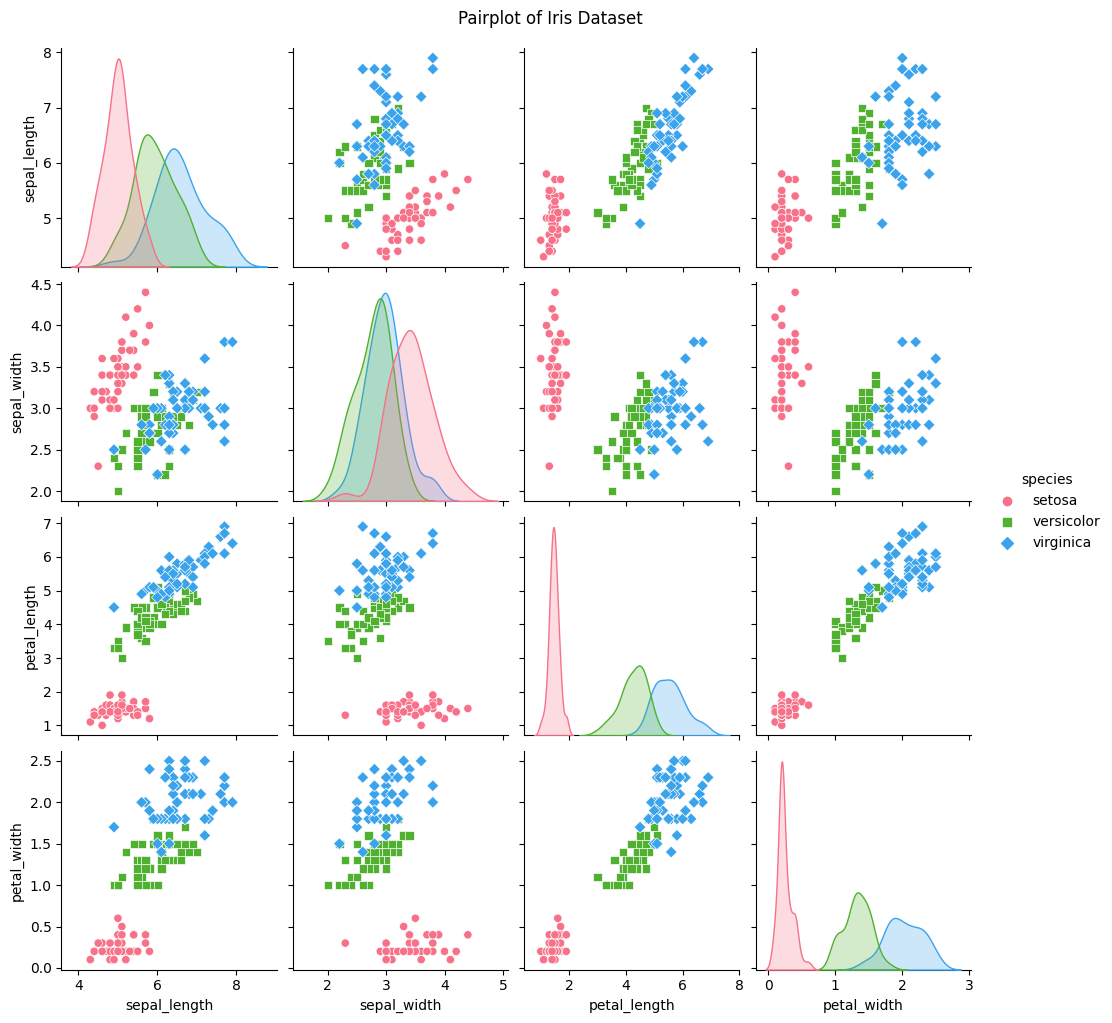

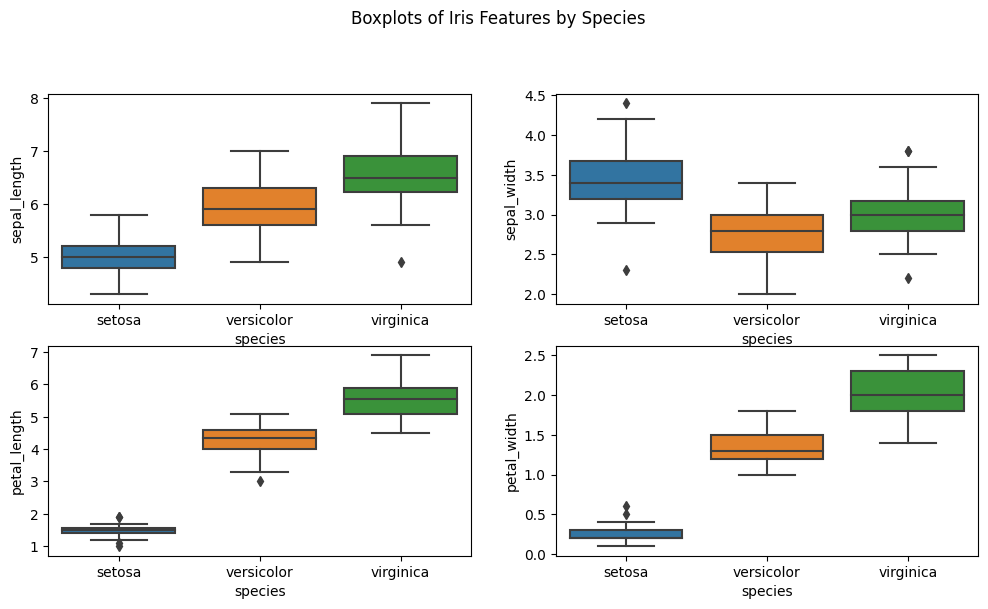

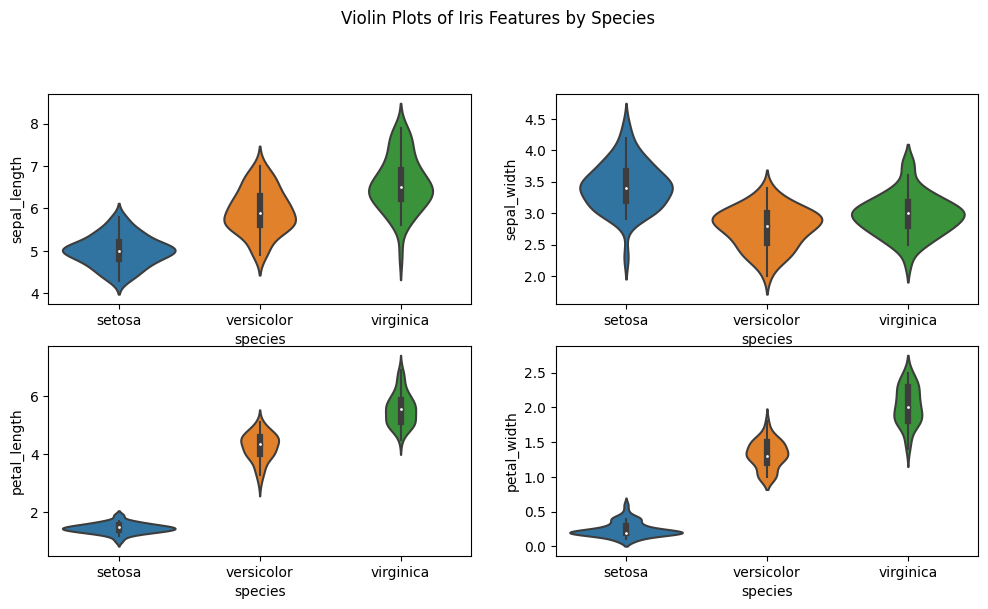

<ipython-input-7-b72d9c7a2ad6>:39: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



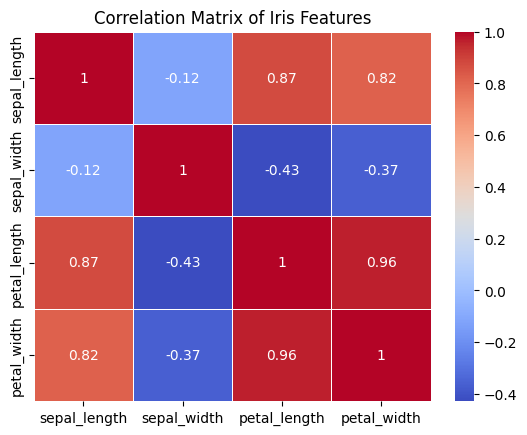

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = sns.load_dataset("iris")

# Pairplot: Scatterplot matrix
sns.pairplot(iris, hue="species", palette="husl", markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

# Boxplot: Distribution of features by species
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x="species", y="sepal_length", data=iris)
plt.subplot(2, 2, 2)
sns.boxplot(x="species", y="sepal_width", data=iris)
plt.subplot(2, 2, 3)
sns.boxplot(x="species", y="petal_length", data=iris)
plt.subplot(2, 2, 4)
sns.boxplot(x="species", y="petal_width", data=iris)
plt.suptitle("Boxplots of Iris Features by Species", y=1.02)
plt.show()

# Violin plot: Distribution of features by species
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.violinplot(x="species", y="sepal_length", data=iris)
plt.subplot(2, 2, 2)
sns.violinplot(x="species", y="sepal_width", data=iris)
plt.subplot(2, 2, 3)
sns.violinplot(x="species", y="petal_length", data=iris)
plt.subplot(2, 2, 4)
sns.violinplot(x="species", y="petal_width", data=iris)
plt.suptitle("Violin Plots of Iris Features by Species", y=1.02)
plt.show()

# Heatmap: Correlation matrix
correlation_matrix = iris.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix of Iris Features")
plt.show()

In [ ]:
iris['species']

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
